# 1. Import Necessary Libraries

In [139]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# 2. Data Preprocessing and Cleansing

### 2.1 - View the Data and Remove Unnecessary Columns

In [113]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1377,3071-MVJCD,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),82.30,5815.15,No
2249,5527-ACHSO,Female,0,No,No,11,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,70.50,829.3,No
6537,1444-VVSGW,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes
5278,1061-PNTHC,Female,0,Yes,Yes,56,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,109.60,5953,No
4369,2592-SEIFQ,Male,0,No,No,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,24.75,66.95,Yes


In [114]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2.2 - Delete NaNs and Empty/Blank Values

In [115]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [116]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [117]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [118]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [119]:
df.iloc[488]['TotalCharges']

' '

In [120]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [121]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2.3 - Convert Total/Monthly Charges from Object to Numeric

In [124]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [123]:
df1.TotalCharges.dtypes

dtype('float64')

# 3. Visualizaing Data

We would like to visualize a bit of the data to understand patterns/trends that we are dealing with.

### 3.1 - Customer Churn vs Tenure

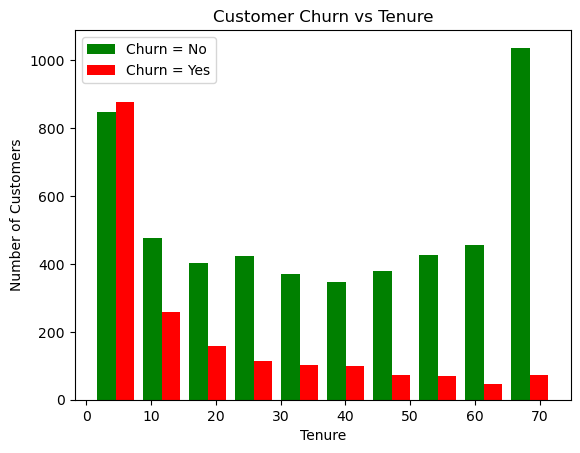

In [127]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn vs Tenure')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['Green','Red'], label=['Churn = No','Churn = Yes'])
plt.legend()

### 3.2 - Customer Churn vs Monthly Charges

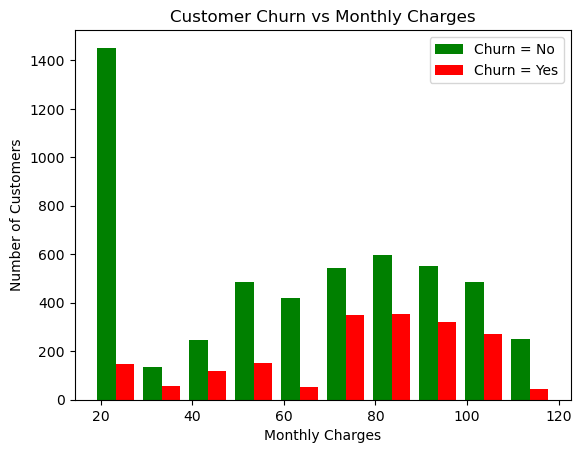

In [129]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn vs Monthly Charges')

plt.hist([mc_churn_no, mc_churn_yes], color=['green','red'], label=['Churn = No','Churn = Yes'])
plt.legend()

# 4. Preparing for ML/DL Prediction

### 4.1 - Converting Categorical Variables to 0s and 1s

In [34]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f' {column} : {df[column].unique()}')

In [42]:
print_unique_col_values(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes']
 OnlineBackup : ['Yes' 'No']
 DeviceProtection : ['No' 'Yes']
 TechSupport : ['No' 'Yes']
 StreamingTV : ['No' 'Yes']
 StreamingMovies : ['No' 'Yes']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


In [40]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [43]:
print_unique_col_values(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes']
 OnlineBackup : ['Yes' 'No']
 DeviceProtection : ['No' 'Yes']
 TechSupport : ['No' 'Yes']
 StreamingTV : ['No' 'Yes']
 StreamingMovies : ['No' 'Yes']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


In [46]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0 },inplace=True)

In [49]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [51]:
df1['gender'].replace({'Female':1,'Male':0 },inplace=True)

In [52]:
df1['gender'].unique()

array([1, 0], dtype=int64)

### 4.2 - One-Hot Encoding

In [54]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [56]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3989,1,0,0,1,8,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3226,0,0,0,0,7,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
455,1,0,0,0,24,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6896,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [57]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### 4.3 - Scale Necessary Values

In [62]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [63]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5776,0,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
2295,0,0,0,0,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
647,0,0,1,1,0.690141,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0


### 4.3 - Splitting Data into Train/Test Sets

In [64]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [69]:
X_train.shape

(5625, 26)

In [70]:
X_test.shape

(1407, 26)

In [71]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [72]:
len(X_train.columns)

26

# 5. Building and Evaluating a Deep Learning Model/Neural Network

### 5.1 - Initializing the Model

In [98]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1,  activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6949
Epoch 2/100
176/176 [==============================] - 0s 890us/step - loss: 0.4495 - accuracy: 0.7904
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 853us/step - loss: 0.4175 - accuracy: 0.8034
Epoch 6/100
176/176 [==============================] - 0s 959us/step - loss: 0.4157 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 0s 818us/step - loss: 0.4139 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 0s 839us/step - loss: 0.4125 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 0s 791us/step - loss: 0.4119 - accuracy: 0.8043
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4

176/176 [==============================] - 0s 884us/step - loss: 0.3861 - accuracy: 0.8165
Epoch 81/100
176/176 [==============================] - 0s 736us/step - loss: 0.3861 - accuracy: 0.8169
Epoch 82/100
176/176 [==============================] - 0s 734us/step - loss: 0.3856 - accuracy: 0.8162
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8171
Epoch 84/100
176/176 [==============================] - 0s 887us/step - loss: 0.3857 - accuracy: 0.8162
Epoch 85/100
176/176 [==============================] - 0s 850us/step - loss: 0.3853 - accuracy: 0.8183
Epoch 86/100
176/176 [==============================] - 0s 711us/step - loss: 0.3854 - accuracy: 0.8187
Epoch 87/100
176/176 [==============================] - 0s 837us/step - loss: 0.3853 - accuracy: 0.8155
Epoch 88/100
176/176 [==============================] - 0s 773us/step - loss: 0.3864 - accuracy: 0.8165
Epoch 89/100
176/176 [==============================] - 0s 747us/step - loss: 0

#### THE MODEL COMPILED WITH AN ACCURACY OF 81.62% OF PREDICTING CUSTOMER CHURN RATE.

### 5.2 - Evaluating Model Using Test Data

In [132]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7903


[0.44386544823646545, 0.7903340458869934]

In [100]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 947us/step


array([[0.19172084],
       [0.41967803],
       [0.01047926],
       [0.81224066],
       [0.37846494]], dtype=float32)

In [101]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [102]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [103]:
y_pred[:5]

[0, 0, 0, 1, 0]

### 5.3 - Analyzing Model Accuracy

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

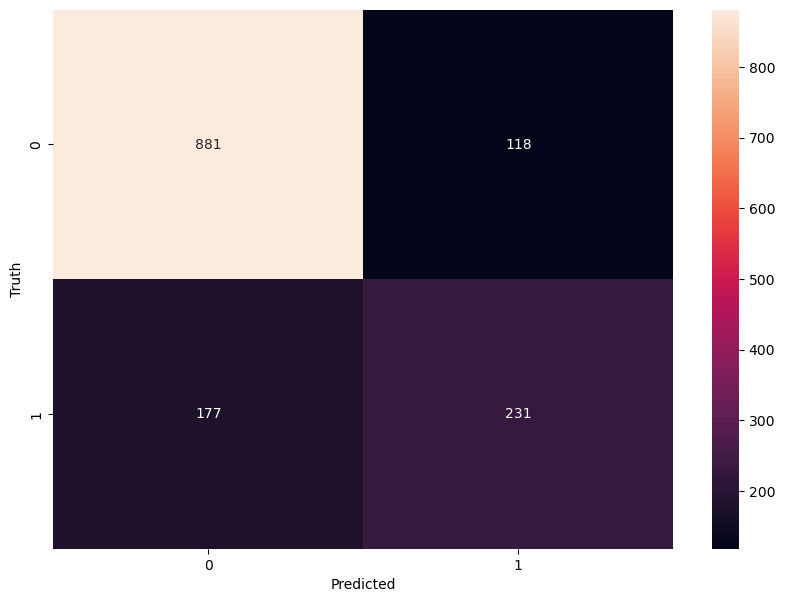

In [134]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

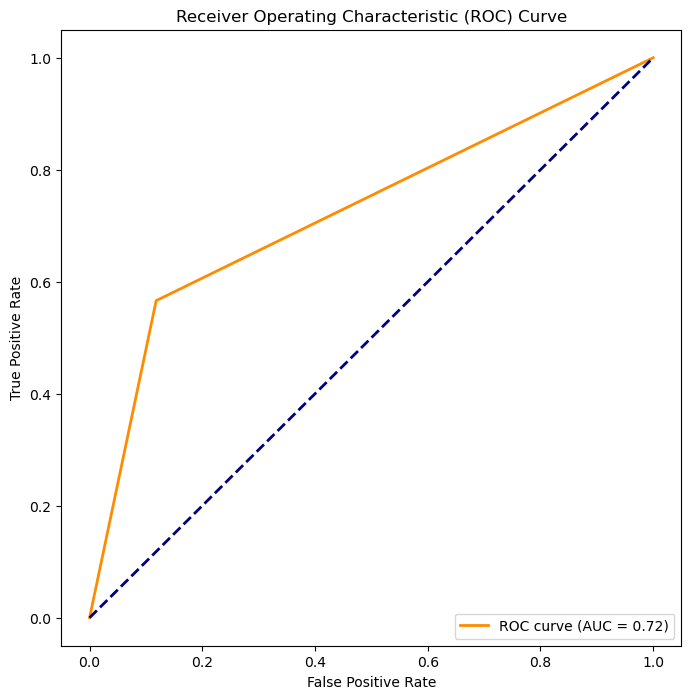

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [141]:
roc_auc = roc_auc_score(y_test, y_pred)

print('AUC-ROC:', roc_auc)

AUC-ROC: 0.7240291762350586


# 6. Concluding Notes

In this project, a deep learning model was built to predict customer churn based on given data. After datapreprocessing, 
visualization, and preparation, it was split into train/test sets and fed into the deep learning model. After running the model, it had an **accuracy of 0.8162** and a loss of 0.3840 on the 100th epoch which is pretty good. After analyzing the precision, recall, and f-scores via a confusion matrix, the area under the curve (AUC) for the receiver operating characteristic (ROC) was calculated which compares the true positive rate to the false positive rate. **The AUC was 0.72, which is a "good discrimination"**, indicating that the model has a reasonable ability to distinguish between positive and negative classes but there is somme room for improvement.

**AUC Scale**

0.5 to 0.6: Poor discrimination

0.6 to 0.7: Fair discrimination

0.7 to 0.8: Good discrimination

0.8 to 0.9: Very good discrimination

0.9 to 1.0: Excellent discrimination